#Лабораторная работа №2
Выполнил студент группы 9381, Игнашов В.М.
##Цель работы
Практическое применение дискретного преобразования Фурье c использованием библиотек Python для анализа речевых сигналов.
##Задание
1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса
3. Построить сонограмму по записи своего голоса.
##Выполнение работы
###Подготовка к выполнению

In [17]:
%matplotlib inline
from scipy import signal
from scipy import fft
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import wave
import math
import more_itertools
import plotly.express as px

audio = 'voiceline.wav'
ipd.Audio(audio)

C:\Users\imsol\AppData\Local\Temp/ipykernel_24536/931401674.py:1: WavFileWarning:

Chunk (non-data) not understood, skipping it.



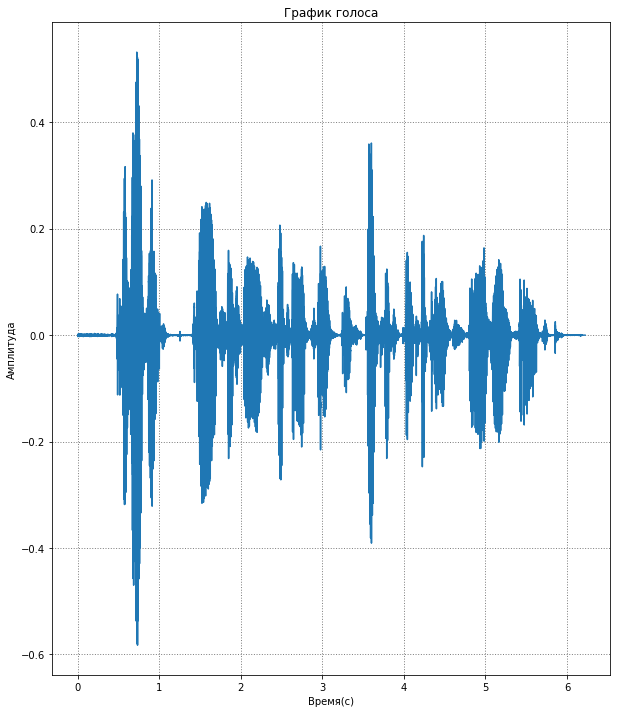

In [18]:
f,s = wavfile.read("voiceline.wav","rb")
t = np.linspace(0, len(s)/f,num=len(s))

plt.figure(figsize=(10, 12))
plt.grid(color='gray', linestyle='dotted', linewidth=1)
plt.xlabel("Время(с)")
plt.ylabel("Амплитуда")
plt.title("График голоса")
plt.plot(t,s)

###Используя ДПФ построить траекторию основного тона на записи своего голоса

In [19]:
lth=512
spectr=round(f/lth)

intervals = list(more_itertools.windowed(s, n=lth, step = int(lth*0.25)))
intervals[len(intervals)-1]=[i for i in intervals[len(intervals)-1] if (i!=None)]
intervals = [i*np.hamming(len(i)) for i in intervals]

**Альтернативный алгоритм ДПФ, крайне медленный и неэффективный**

In [20]:
def DFT_slow(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [21]:
%%time
intervals_t = [DFT_slow(i) for i in intervals]

Wall time: 12.9 s


**Встроеный алгоритм ДПФ, быстрее альтернативного**

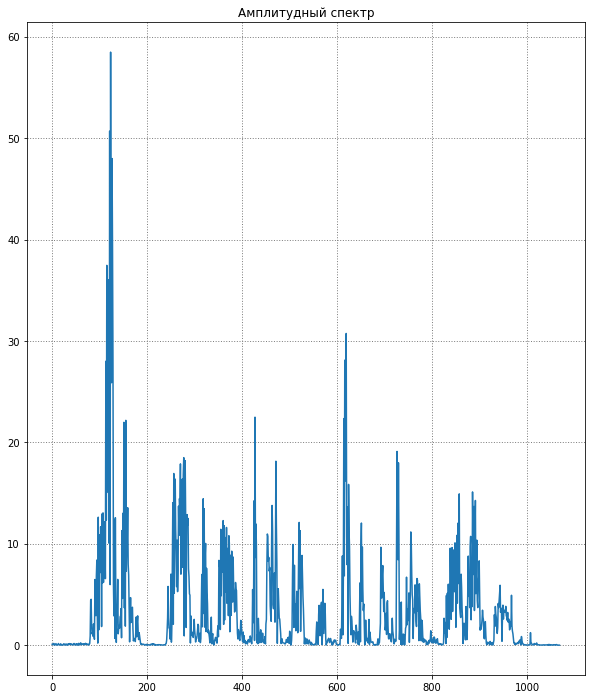

In [22]:
intervals = [fft.rfft(j) for j in intervals]
spectr_ampl = [sum([j**2 for j in i[:int(len(i)/2)]])**0.5 for i in intervals]
spectr_ampl = np.array([i.real for i in spectr_ampl])

plt.figure(figsize=(10, 12))
plt.grid(color='gray', linestyle='dotted', linewidth=1)
plt.title("Амплитудный спектр")
plt.plot(spectr_ampl)

###Траектория основного тона

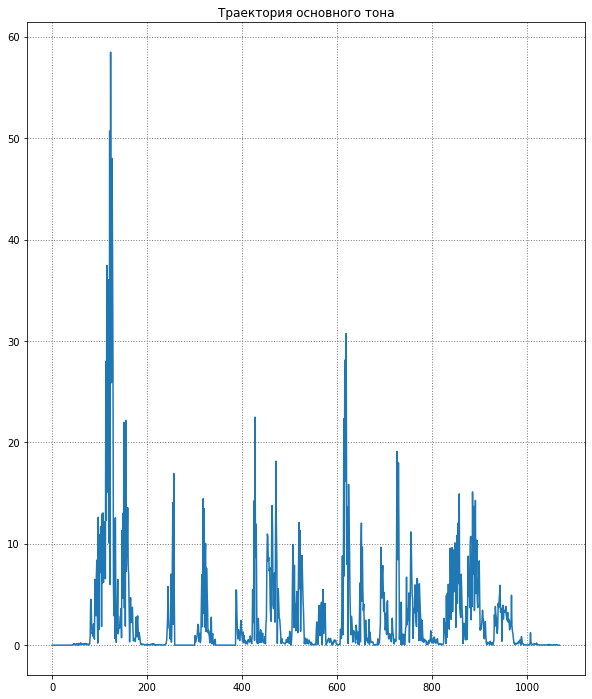

In [23]:
res0 = []
for i in range(0, len(spectr_ampl), spectr):
    seg = np.array(spectr_ampl[i:i+spectr])               
    if seg.max() > 2.5*seg.mean():            
        res0 += seg.tolist()
    else:
        res0 += [0 for i in range(len(seg))]
        
plt.figure(figsize=(10, 12))
plt.grid(color='gray', linestyle='dotted', linewidth=1)
plt.title("Траектория основного тона")
plt.plot(res0)

###Используя ДПФ построить траектории второй, третьей и четсвертной формантных частот на записи своего голоса

In [24]:
res1=[]
res2=[]
res3=[]
j=0

while j < len(res0):
    if ((2*j-1)  in range(len(res0))) and ((2*j+1)  in range(len(res0))) :
        mx = max(res0[2*j-1], res0[2*j+1])
        if res0[j] > 2*mx:           
            res1.append(mx)
        else:
            res1.append(0)
    else:
        res1.append(0)
        
        
    if ((3*j-1)  in range(len(res0))) and ((3*j+1)  in range(len(res0))) :
        mx = max(res0[3*j-1], res0[3*j+1])
        if res0[j] > 4*mx:           
            res2.append(mx)
        else:
            res2.append(0)
    else:
        res2.append(0)
    
    
    if ((4*j-1)  in range(len(res0))) and ((4*j+1)  in range(len(res0))) :
        mx = max(res0[4*j-1], res0[4*j+1])
        if res0[j] > 8*mx:           
            res3.append(mx)
        else:
            res3.append(0)
    else:
        res3.append(0)
    j += 1

**Вторая формантная частота:**

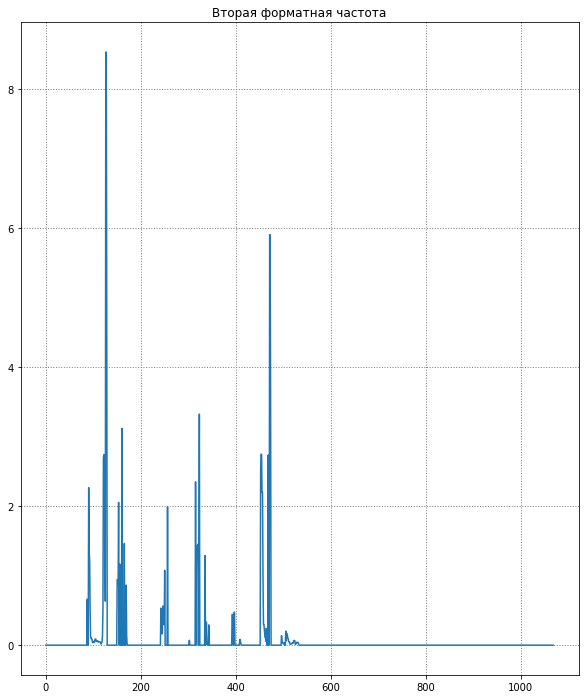

In [25]:
plt.figure(figsize=(10, 12))
plt.grid(color='gray', linestyle='dotted', linewidth=1)
plt.title("Вторая форматная частота")
plt.plot(res1)

**Третья формантная частота:**

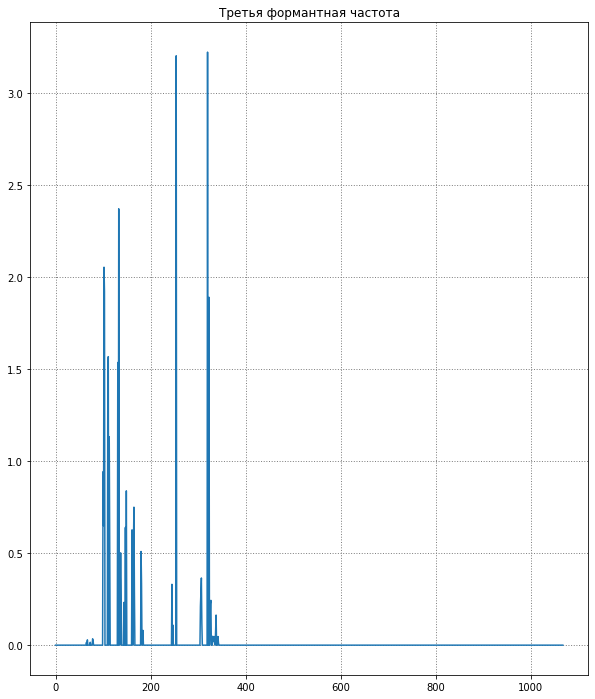

In [26]:
plt.figure(figsize=(10, 12))
plt.grid(color='gray', linestyle='dotted', linewidth=1)
plt.title("Третья формантная частота")
plt.plot(res2)

**Четвертая формантная частота:**

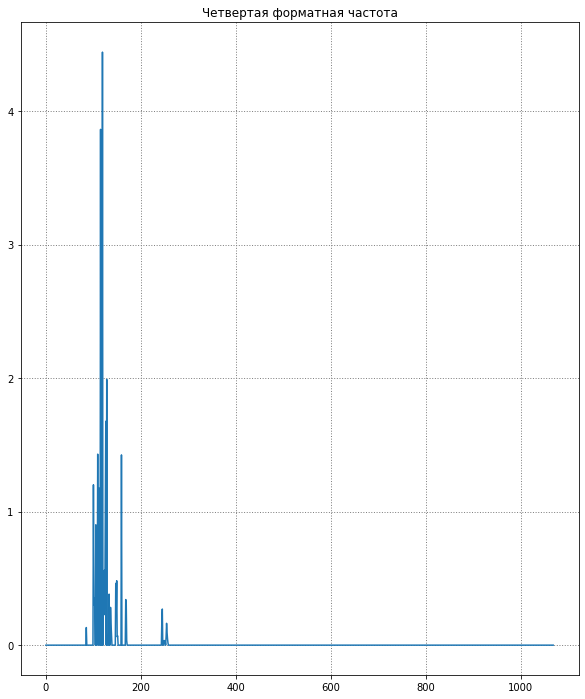

In [27]:
plt.figure(figsize=(10, 12))
plt.grid(color='gray', linestyle='dotted', linewidth=1)
plt.title("Четвертая форматная частота")
plt.plot(res3)

###Построить сонограмму по записи своего голоса

In [28]:
gr = []

for i in range(0, len(spectr_ampl), spectr):
    seg = list(spectr_ampl[i:i+spectr])  
    gr.append(seg)
gr = gr[:-1]
gr = np.array(gr)
gr.reshape(len(gr), len(gr[0]))
fig = px.imshow(gr)
fig.show()

##Выводы
Были построены траектория основного тона, траектории второй, третьей и четвертой формантных частот и сонограмма по записи собственного голоса, также отражены на графиках. Сонограмма была построена в png-формате.